In [1]:
import os
os.chdir('../')
print(os.getcwd())

/home/dli/master-project/ynet_adaptive_work


In [2]:
from utils.dataset import *

In [3]:
data_raw='sdd_ynet/dataset_raw' # See README.md on how to download the raw dataset
step=12
window_size=20
stride=20
obs_len=8
data_filter='sdd_ynet/dataset_filter_custom' # Path to new dataset in sdd_ynet directory
labels=['Pedestrian', 'Biker']

In [4]:
os.getcwd()

'/home/dli/master-project/ynet_adaptive_work'

In [6]:
os.chdir('../')

In [213]:
df = load_raw_dataset(data_raw, step, window_size, stride)

In [8]:
df.shape

(465200, 8)

In [9]:
df

,trackId,frame,label,x,y,sceneId,metaId,frame_diff
0,0,10064,Biker,213.0,1067.0,bookstore_0,0,1.0
1,0,10076,Biker,229.0,1035.5,bookstore_0,0,1.0
2,0,10088,Biker,251.0,1008.0,bookstore_0,0,1.0
3,0,10100,Biker,276.5,983.0,bookstore_0,0,1.0
4,0,10112,Biker,306.0,963.0,bookstore_0,0,1.0
...,...,...,...,...,...,...,...,...
465195,7,460,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465196,7,472,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465197,7,484,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465198,7,496,Pedestrian,1922.0,173.0,quad_3,23259,1.0


In [14]:
df_ped_biker = df[(df.label == 'Biker') | (df.label == 'Pedestrian')]
df_ped_biker

,trackId,frame,label,x,y,sceneId,metaId,frame_diff
0,0,10064,Biker,213.0,1067.0,bookstore_0,0,1.0
1,0,10076,Biker,229.0,1035.5,bookstore_0,0,1.0
2,0,10088,Biker,251.0,1008.0,bookstore_0,0,1.0
3,0,10100,Biker,276.5,983.0,bookstore_0,0,1.0
4,0,10112,Biker,306.0,963.0,bookstore_0,0,1.0
...,...,...,...,...,...,...,...,...
465195,7,460,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465196,7,472,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465197,7,484,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465198,7,496,Pedestrian,1922.0,173.0,quad_3,23259,1.0


In [17]:
np.tile(np.arange(20), 2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19])

In [20]:
df['step'] = np.tile(np.arange(20), int(df.shape[0]/20))

In [21]:
df

,trackId,frame,label,x,y,sceneId,metaId,frame_diff,step
0,0,10064,Biker,213.0,1067.0,bookstore_0,0,1.0,0
1,0,10076,Biker,229.0,1035.5,bookstore_0,0,1.0,1
2,0,10088,Biker,251.0,1008.0,bookstore_0,0,1.0,2
3,0,10100,Biker,276.5,983.0,bookstore_0,0,1.0,3
4,0,10112,Biker,306.0,963.0,bookstore_0,0,1.0,4
...,...,...,...,...,...,...,...,...,...
465195,7,460,Pedestrian,1922.0,173.0,quad_3,23259,1.0,15
465196,7,472,Pedestrian,1922.0,173.0,quad_3,23259,1.0,16
465197,7,484,Pedestrian,1922.0,173.0,quad_3,23259,1.0,17
465198,7,496,Pedestrian,1922.0,173.0,quad_3,23259,1.0,18


In [27]:
df_scene = df[df.sceneId == 'bookstore_0']
df_scene

,trackId,frame,label,x,y,sceneId,metaId,frame_diff,step
0,0,10064,Biker,213.0,1067.0,bookstore_0,0,1.0,0
1,0,10076,Biker,229.0,1035.5,bookstore_0,0,1.0,1
2,0,10088,Biker,251.0,1008.0,bookstore_0,0,1.0,2
3,0,10100,Biker,276.5,983.0,bookstore_0,0,1.0,3
4,0,10112,Biker,306.0,963.0,bookstore_0,0,1.0,4
...,...,...,...,...,...,...,...,...,...
18535,236,8011,Biker,111.5,598.0,bookstore_0,926,1.0,15
18536,236,8023,Biker,115.5,627.5,bookstore_0,926,1.0,16
18537,236,8035,Biker,121.0,668.5,bookstore_0,926,1.0,17
18538,236,8047,Biker,125.0,704.5,bookstore_0,926,1.0,18


In [7]:
from tqdm import tqdm 

In [10]:
for i in tqdm(range(100)):
    print(i)

100%|██████████| 100/100 [00:00<00:00, 63444.32it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [70]:
df_group = df_scene.groupby('step').get_group(0)

In [71]:
df_t = df_group[df_group.metaId == metaId]
df_t

,trackId,frame,label,x,y,sceneId,metaId,frame_diff,step
20,1,10009,Biker,1394.0,633.0,bookstore_0,1,1.0,0


In [72]:
t_frame, t_x, t_y = df_t.iloc[0].frame, df_t.iloc[0].x, df_t.iloc[0].y
t_frame, t_x, t_y

(10009, 1394.0, 633.0)

In [73]:
df_group['frame_inter_diff'] = df_group.frame - t_frame
df_group

<ipython-input-73-452baae0bdb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['frame_inter_diff'] = df_group.frame - t_frame


,trackId,frame,label,x,y,sceneId,metaId,frame_diff,step,frame_inter_diff
0,0,10064,Biker,213.0,1067.0,bookstore_0,0,1.0,0,55
20,1,10009,Biker,1394.0,633.0,bookstore_0,1,1.0,0,0
40,2,6881,Pedestrian,17.0,893.5,bookstore_0,2,1.0,0,-3128
60,2,7121,Pedestrian,274.5,920.5,bookstore_0,3,1.0,0,-2888
80,2,7361,Pedestrian,296.0,988.5,bookstore_0,4,1.0,0,-2648
...,...,...,...,...,...,...,...,...,...,...
18440,235,8895,Pedestrian,462.5,601.0,bookstore_0,922,1.0,0,-1114
18460,235,9135,Pedestrian,699.5,604.5,bookstore_0,923,1.0,0,-874
18480,235,9375,Pedestrian,937.0,582.0,bookstore_0,924,1.0,0,-634
18500,235,9615,Pedestrian,1181.5,563.0,bookstore_0,925,1.0,0,-394


In [76]:
step = 12
mask_sim = (df_group.frame_inter_diff < step/2) & \
        (df_group.frame_inter_diff >= -step/2) # & (df_group.metaId != metaId)
df_sim = df_group[mask_sim]
df_sim

,trackId,frame,label,x,y,sceneId,metaId,frame_diff,step,frame_inter_diff
20,1,10009,Biker,1394.0,633.0,bookstore_0,1,1.0,0,0


In [3]:
import numpy as np

In [6]:
(~np.array([True, False, True])).sum()

1

In [153]:
def lambda_distance_with_neighbors(row, df_scene):
    frame, x, y, meta_id = row.frame, row.x, row.y, row.metaId
    df_scene['frame_inter_diff'] = df_group.frame - frame
    mask_sim = (df_scene.frame_inter_diff < step/2) & \
        (df_scene.frame_inter_diff >= -step/2) & (df_scene.metaId != meta_id)
    df_sim = df_scene[mask_sim]
    if df_sim.shape[0] == 0:
        dist = np.inf
    else:
        dist = compute_distance_xy(df_sim, x, y)
    return dist


In [96]:
df_scene.shape, df.shape

((18540, 10), (465200, 9))

In [154]:
r = df_scene.apply(lambda_distance_with_neighbors, axis=1, df_scene=df_scene)

In [155]:
df_scene['dist'] = r

<ipython-input-155-9818b2cc55fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scene['dist'] = r


In [156]:
df_scene

,trackId,frame,label,x,y,sceneId,metaId,frame_diff,step,frame_inter_diff,dist
0,0,10064,Biker,213.0,1067.0,bookstore_0,0,1.0,0,2005.0,inf
1,0,10076,Biker,229.0,1035.5,bookstore_0,0,1.0,1,NaN,inf
2,0,10088,Biker,251.0,1008.0,bookstore_0,0,1.0,2,NaN,inf
3,0,10100,Biker,276.5,983.0,bookstore_0,0,1.0,3,NaN,[987.7400973940463]
4,0,10112,Biker,306.0,963.0,bookstore_0,0,1.0,4,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...
18535,236,8011,Biker,111.5,598.0,bookstore_0,926,1.0,15,NaN,[383.1931627782521]
18536,236,8023,Biker,115.5,627.5,bookstore_0,926,1.0,16,NaN,"[865.2619545548042, 901.7196071950526, 850.353..."
18537,236,8035,Biker,121.0,668.5,bookstore_0,926,1.0,17,NaN,"[241.93490860146662, 607.3847627328166]"
18538,236,8047,Biker,125.0,704.5,bookstore_0,926,1.0,18,NaN,"[401.5003113323824, 363.21240342257033]"


In [152]:
def compute_distance_xy(df_sim, x, y):
    df_sim['x_diff'] = df_sim['x'] - x
    df_sim['y_diff'] = df_sim['y'] - y
    dist = np.sqrt((df_sim.x_diff ** 2 + df_sim.y_diff ** 2))
    return np.array(dist)

In [147]:
compute_distance_xy(df_scene[:10], 10, 10)

<ipython-input-146-9030c9b63cac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['x_diff'] = df_sim['x'] - x
<ipython-input-146-9030c9b63cac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sim['y_diff'] = df_sim['y'] - y


[1076.3168678414363,
 1048.6235025022088,
 1026.686417558935,
 1008.8365824056937,
 997.9103166116682,
 995.2994524262534,
 994.6079629683245,
 994.6622542350746,
 1003.8148484655923,
 1016.8531113194275]

In [157]:
valid_dist = df_scene[df_scene.dist.apply(lambda x: x.any() != np.inf if not isinstance(x, float) else x != np.inf)].dist

In [158]:
valid_dist.tolist()

[array([987.74009739]),
 array([410.13442918]),
 array([378.16993535, 267.96688228]),
 array([395.79950733, 436.2046538 ]),
 array([404.88918237, 818.89941385, 116.61260652]),
 array([128.31601615]),
 array([568.03521018]),
 array([636.4400993]),
 array([261.09816162]),
 array([ 373.77867783, 1351.9642192 ]),
 array([557.67575705]),
 array([680.13711853]),
 array([1044.81876419]),
 array([1144.11636209]),
 array([500.96157537]),
 array([562.02691217, 476.23628589]),
 array([457.35106866, 470.37033282]),
 array([477.46544378]),
 array([743.00016824, 505.33998456]),
 array([502.17775737]),
 array([508.32199441]),
 array([560.56043385]),
 array([1371.02151697]),
 array([1020.82185028,  273.90007302,  293.35686459]),
 array([297.32557912]),
 array([469.77441395]),
 array([823.22597141]),
 array([406.86269183]),
 array([703.53766779, 740.3122652 , 778.9043587 ]),
 array([297.82922959]),
 array([168.73425853,  61.16575839, 364.23103931]),
 array([859.0311403 , 940.05239216, 779.59685094]),
 

In [159]:
from itertools import chain

In [167]:
arr_dist = np.array(list(chain.from_iterable(valid_dist.tolist())))
arr_dist

array([ 987.74009739,  410.13442918,  378.16993535, ...,  401.50031133,
        363.21240342, 1270.36412103])

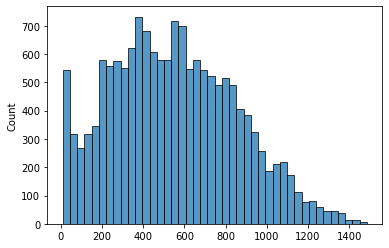

In [168]:
sns.histplot(arr_dist)

In [174]:
arr_dist[arr_dist < 100], arr_dist[arr_dist < 100].shape

(array([61.16575839, 95.8018789 , 95.13805758, ..., 47.85394446,
        46.02445002, 77.95671876]),
 (1023,))

In [94]:
df_scene.apply(lambda_get_min_distance, axis=1, df_scene=df_scene)

0               inf
1               inf
2               inf
3         975630.50
4               inf
            ...    
18535     146837.00
18536     723100.25
18537      58532.50
18538     131923.25
18539    1613825.00
Length: 18540, dtype: float64

In [78]:
metaId = 1
df_scene.groupby('step').apply(lambda_find_closest_step, metaId)

step
0     inf
1     inf
2     inf
3     inf
4     inf
5     inf
6     inf
7     inf
8     inf
9     inf
10    inf
11    inf
12    inf
13    inf
14    inf
15    inf
16    inf
17    inf
18    inf
19    inf
dtype: float64

In [25]:
df.shape[0]/20

23260.0

In [15]:
df_ped_biker.shape[0] / 20

20012.0

In [20]:
df_ped_biker.groupby('sceneId').count()/20

,trackId,frame,label,x,y,metaId,frame_diff
sceneId,,,,,,,
bookstore_0,911.0,911.0,911.0,911.0,911.0,911.0,911.0
bookstore_1,609.0,609.0,609.0,609.0,609.0,609.0,609.0
bookstore_2,555.0,555.0,555.0,555.0,555.0,555.0,555.0
bookstore_3,558.0,558.0,558.0,558.0,558.0,558.0,558.0
bookstore_4,211.0,211.0,211.0,211.0,211.0,211.0,211.0
bookstore_5,202.0,202.0,202.0,202.0,202.0,202.0,202.0
bookstore_6,213.0,213.0,213.0,213.0,213.0,213.0,213.0
coupa_0,417.0,417.0,417.0,417.0,417.0,417.0,417.0
coupa_1,260.0,260.0,260.0,260.0,260.0,260.0,260.0


In [16]:
df.dtypes

trackId         int64
frame           int64
label          object
x             float64
y             float64
sceneId        object
metaId          int64
frame_diff    float64
dtype: object

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df.frame.nunique()

14429

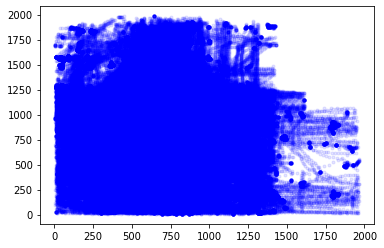

In [48]:
df_b0 = df[df['sceneId'] == 'bookstore_0']
df_b0_grouped = df.groupby('metaId')
for group_key in df_b0_grouped.groups.keys():
    group = df_b0_grouped.get_group(group_key)
    plt.plot(group['x'], group['y'], 'b.', alpha=0.1)

In [22]:
os.getcwd()

'/home/dli/master-project/ynet_adaptive_work'

In [23]:
train_trajnet = pd.read_pickle('./sdd_ynet/ynet_additional_files/train_trajnet.pkl')

In [24]:
train_trajnet

,frame,trackId,x,y,sceneId,metaId
0,0,100,757.0,918.5,bookstore_0,0
1,12,100,765.0,918.5,bookstore_0,0
2,24,100,773.0,918.5,bookstore_0,0
3,36,100,780.5,918.5,bookstore_0,0
4,48,100,788.5,919.5,bookstore_0,0
...,...,...,...,...,...,...
169875,11424,273,89.5,948.5,nexus_9,8493
169876,11436,273,80.0,944.0,nexus_9,8493
169877,11448,273,72.0,940.0,nexus_9,8493
169878,11460,273,64.0,936.0,nexus_9,8493


### Plot data distribution by variation factor

In [5]:
plot_varf_histograms(df, 'figures', 'avg_vel', obs_len)
plot_varf_histograms(df, 'figures', 'max_vel', obs_len)

In [ ]:
plot_varf_histograms(df, 'figures', 'avg_acc', obs_len)
plot_varf_histograms(df, 'figures', 'max_acc', obs_len)
plot_varf_histograms(df, 'figures', 'min_acc', obs_len)

In [26]:
plot_varf_histograms_sns(df, 'figures', 'min_dist', obs_len)

KeyboardInterrupt: 

In [6]:
plot_varf_histograms_sns(df, 'figures', 'avg_vel', obs_len)
plot_varf_histograms_sns(df, 'figures', 'max_vel', obs_len)

In [7]:
plot_varf_histograms_sns(df, 'figures', 'avg_acc', obs_len)
plot_varf_histograms_sns(df, 'figures', 'max_acc', obs_len)
plot_varf_histograms_sns(df, 'figures', 'min_acc', obs_len)

In [8]:
plot_varf_histograms_sns(df, 'figures', 'abs+avg_acc', obs_len)
plot_varf_histograms_sns(df, 'figures', 'abs+max_acc', obs_len)

### Check datasets consistency before and after changes

In [14]:
import pandas as pd

In [16]:
new, old = [], []
vel_ranges = ['0.25_0.75', '1.25_1.75', '2.25_2.75', '3.25_3.75']
for r in vel_ranges:
    new.append(pd.read_pickle(f'sdd_ynet/dataset_filter/{r}.pkl'))
    old.append(pd.read_pickle(f'sdd_ynet/dataset_filter/dataset_ped_biker/gap/{r}.pkl'))


In [18]:
len(new), len(old)

(4, 4)

In [28]:
for i, _ in enumerate(vel_ranges):
    print(new[i].iloc[:, :-1].equals(old[i].iloc[:, :-1]))

True
True
True
True


In [178]:
a=[1, 2, 8, 9, 5, 6, 8, 5, 8, 7, 9, 3, 4, 8, 9, 5, 6, 8, 5, 8, 7, 9, 10]
b=[1, 8, 4, 1, 2, 4, 2, 3, 1, 4, 2, 5, 9, 8, 6, 4, 7, 6, 1, 2, 2, 3, 10]

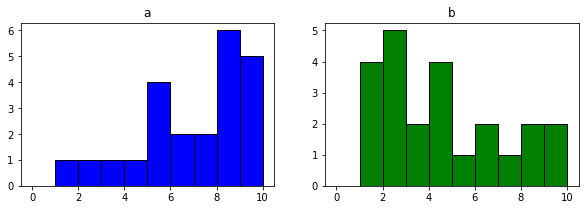

In [182]:
fig, ax = plt.subplots(1,2,figsize=(10, 3))

plt.subplot(121)
plot1=plt.hist(a, bins=[0,1,2,3,4,5,6,7,8,9,10],edgecolor='k',linewidth=1.0,color='blue')
plt.title("a")

plt.subplot(122)
plot2=plt.hist(b, bins=[0,1,2,3,4,5,6,7,8,9,10],edgecolor='k',linewidth=1.0,color='green')
plt.title("b")

plt.show()

In [191]:
plot1[0]

array([0., 1., 1., 1., 1., 4., 2., 2., 6., 5.])

In [186]:
plot1

(array([0., 1., 1., 1., 1., 4., 2., 2., 6., 5.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

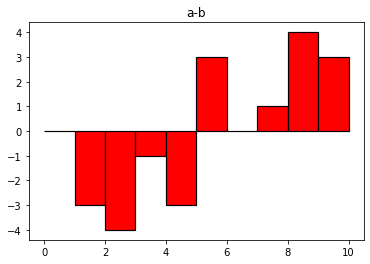

In [193]:
diff=plt.bar(plot1[1][:-1], 
             height=(plot1[0]-plot2[0]), edgecolor='black', 
             linewidth=1.2, color='red',width = 1, align = 'edge') 
plt.title("a-b")
plt.show()

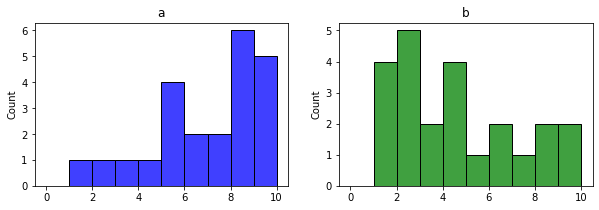

In [194]:
fig, ax = plt.subplots(1,2,figsize=(10, 3))

plt.subplot(121)
plot1_sns=sns.histplot(a, bins=[0,1,2,3,4,5,6,7,8,9,10],edgecolor='k',linewidth=1.0,color='blue')
plt.title("a")

plt.subplot(122)
plot2_sns=sns.histplot(b, bins=[0,1,2,3,4,5,6,7,8,9,10],edgecolor='k',linewidth=1.0,color='green')
plt.title("b")

plt.show()

In [195]:
plot1_sns

In [206]:
df_a = pd.DataFrame(a, columns=['num'])
df_a['type'] = 'obs'
df_b = pd.DataFrame(b, columns=['num'])
df_b['type'] = 'com'
df_ab = pd.concat([df_a, df_b], axis=0)
df_ab = df_ab.reset_index(drop=True)
df_ab

,num,type
0,1,obs
1,2,obs
2,8,obs
3,9,obs
4,5,obs
5,6,obs
6,8,obs
7,5,obs
8,8,obs
9,7,obs


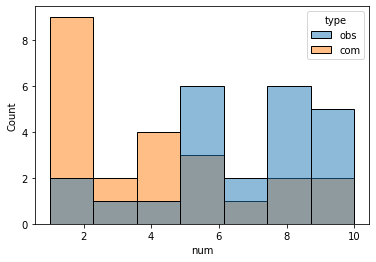

In [207]:
sns.histplot(data=df_ab, x='num', hue="type")

In [208]:
varf_list = ['min_dist', 'avg_den', 'tot_den']

In [210]:
[s for s in varf_list if 'den' in s]

['avg_den', 'tot_den']

In [212]:
any('den' in mystring for mystring in varf_list)

True

In [214]:
df.groupby('sceneId').count()

,trackId,frame,label,x,y,metaId,frame_diff
sceneId,,,,,,,
bookstore_0,18540,18540,18540,18540,18540,18540,18540
bookstore_1,12380,12380,12380,12380,12380,12380,12380
bookstore_2,11340,11340,11340,11340,11340,11340,11340
bookstore_3,11380,11380,11380,11380,11380,11380,11380
bookstore_4,4360,4360,4360,4360,4360,4360,4360
bookstore_5,4160,4160,4160,4160,4160,4160,4160
bookstore_6,4340,4340,4340,4340,4340,4340,4340
coupa_0,8340,8340,8340,8340,8340,8340,8340
coupa_1,5220,5220,5220,5220,5220,5220,5220


In [218]:
df_sample = df[(df.sceneId == 'hyang_8') | (df.sceneId == 'hyang_9')]

In [219]:
df_sample

,trackId,frame,label,x,y,sceneId,metaId,frame_diff
335540,1,0,Pedestrian,1177.0,941.0,hyang_8,16777,1.0
335541,1,12,Pedestrian,1162.0,945.5,hyang_8,16777,1.0
335542,1,24,Pedestrian,1148.0,949.5,hyang_8,16777,1.0
335543,1,36,Pedestrian,1133.0,953.5,hyang_8,16777,1.0
335544,1,48,Pedestrian,1119.0,957.5,hyang_8,16777,1.0
...,...,...,...,...,...,...,...,...
335855,10,281,Biker,798.0,820.0,hyang_9,16792,1.0
335856,10,293,Biker,849.0,812.0,hyang_9,16792,1.0
335857,10,305,Biker,899.5,807.5,hyang_9,16792,1.0
335858,10,317,Biker,954.0,803.5,hyang_9,16792,1.0


In [220]:
def compute_distance_with_neighbors(df_scene):
    return df_scene.apply(lambda_distance_with_neighbors, axis=1, df_scene=df_scene)


def lambda_distance_with_neighbors(row, df_scene, step=12):
    start = datetime.datetime.now()
    print(start) 
    frame_diff = df_scene.frame - row.frame
    print(datetime.datetime.now())
    df_sim = df_scene[(frame_diff < step/2) & \
        (frame_diff >= -step/2) & (df_scene.metaId != row.metaId)]
    print(datetime.datetime.now())
    dist = np.inf if df_sim.shape[0] == 0 else compute_distance_xy(df_sim, row.x, row.y)
    print(datetime.datetime.now())
    duration = datetime.datetime.now() - start
    print(f'### meta_id = {row.metaId}, time = {duration}')
    return dist

In [222]:
import datetime

In [226]:
out = df_sample.groupby('sceneId').apply(compute_distance_with_neighbors)

2022-03-22 18:34:58.091031
2022-03-22 18:34:58.091416
2022-03-22 18:34:58.092409
2022-03-22 18:34:58.094225
### meta_id = 16777, time = 0:00:00.003592
2022-03-22 18:34:58.094688
2022-03-22 18:34:58.094884
2022-03-22 18:34:58.095767
2022-03-22 18:34:58.097443
### meta_id = 16777, time = 0:00:00.003069
2022-03-22 18:34:58.097821
2022-03-22 18:34:58.098005
2022-03-22 18:34:58.186003
2022-03-22 18:34:58.187979
### meta_id = 16777, time = 0:00:00.090198
2022-03-22 18:34:58.188077
2022-03-22 18:34:58.188254
2022-03-22 18:34:58.189122
2022-03-22 18:34:58.190705
### meta_id = 16777, time = 0:00:00.002964
2022-03-22 18:34:58.191104
2022-03-22 18:34:58.191285
2022-03-22 18:34:58.192152
2022-03-22 18:34:58.193977
### meta_id = 16777, time = 0:00:00.002982
2022-03-22 18:34:58.194147
2022-03-22 18:34:58.194330
2022-03-22 18:34:58.195203
2022-03-22 18:34:58.196812
### meta_id = 16777, time = 0:00:00.002964
2022-03-22 18:34:58.197174
2022-03-22 18:34:58.197356
2022-03-22 18:34:58.198222
2022-03-22 18

In [229]:
out

sceneId        
hyang_8  335540    [1000.8468913874889, 1178.4551327903832, 397.6...
         335541    [971.7458515476153, 1167.645601199268, 402.905...
         335542    [943.1484506693524, 1156.2594864475707, 408.06...
         335543    [913.5978327469916, 1146.2461559368476, 413.80...
         335544    [885.0909557779923, 1134.9142038057325, 419.87...
                                         ...                        
hyang_9  335855              [130.43197460745583, 660.8649635137272]
         335856              [121.16620816052634, 655.4208571597337]
         335857              [181.37047720067343, 655.6256553857544]
         335858               [266.5168850185669, 657.9120381935567]
         335859              [357.76109346881196, 660.3393067204163]
Length: 320, dtype: object

In [234]:
df_sample.loc[out['hyang_8'].index, 'dist'] = out['hyang_8'].values

/home/dli/anaconda3/envs/ynetv/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/dli/anaconda3/envs/ynetv/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [235]:
df_sample

,trackId,frame,label,x,y,sceneId,metaId,frame_diff,dist
335540,1,0,Pedestrian,1177.0,941.0,hyang_8,16777,1.0,"[1000.8468913874889, 1178.4551327903832, 397.6..."
335541,1,12,Pedestrian,1162.0,945.5,hyang_8,16777,1.0,"[971.7458515476153, 1167.645601199268, 402.905..."
335542,1,24,Pedestrian,1148.0,949.5,hyang_8,16777,1.0,"[943.1484506693524, 1156.2594864475707, 408.06..."
335543,1,36,Pedestrian,1133.0,953.5,hyang_8,16777,1.0,"[913.5978327469916, 1146.2461559368476, 413.80..."
335544,1,48,Pedestrian,1119.0,957.5,hyang_8,16777,1.0,"[885.0909557779923, 1134.9142038057325, 419.87..."
...,...,...,...,...,...,...,...,...,...
335855,10,281,Biker,798.0,820.0,hyang_9,16792,1.0,NaN
335856,10,293,Biker,849.0,812.0,hyang_9,16792,1.0,NaN
335857,10,305,Biker,899.5,807.5,hyang_9,16792,1.0,NaN
335858,10,317,Biker,954.0,803.5,hyang_9,16792,1.0,NaN


In [243]:
out.index.get_level_values('sceneId').unique()

Index(['hyang_8', 'hyang_9'], dtype='object', name='sceneId')

In [247]:
for idx_1st in out.index.get_level_values('sceneId').unique():
    print(idx_1st)
    df_sample.loc[out[idx_1st].index, 'dist'] = out[idx_1st].values

hyang_8
hyang_9


/home/dli/anaconda3/envs/ynetv/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
